<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/Quantum_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector

     |████████████████████████████████| 6.5 MB 4.1 MB/s 
     |████████████████████████████████| 18.0 MB 77 kB/s 
     |████████████████████████████████| 238 kB 60.2 MB/s 
     |████████████████████████████████| 200 kB 54.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 1.6 MB 50.2 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 943 kB 48.1 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 3.6 MB 46.4 MB/s 
     |████████████████████████████████| 113 kB 57.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=aab4114524df49b67a1a7f796a209c51f8d9b2bb90be534e71a2c8c8486d931a
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c94

In [2]:
from math import sqrt, pi

In [3]:
qc = QuantumCircuit(1)

In [6]:
initial_state = [0,1] ## Definig Initial State as |1>
qc.initialize(initial_state,0) ## Apply the initialization operation on the 0th qubit
qc.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [9]:
from qiskit import execute

result1 = execute(qc, Aer.get_backend('aer_simulator')).result()


In [10]:
qc.save_statevector()
output_state = result1.get_statevector()

In [11]:
print(output_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [12]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░──░─┤M├
        └─────────────────┘ ░  ░  ░ └╥┘
meas: 1/═════════════════════════════╩═
                                     0

In [18]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
##plot_histogram(counts)

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Duplicate key "statevector" in save instruction.


In [20]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc1 = QuantumCircuit(1) # Must redefine qc
qc1.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc1.save_statevector() # Save statevector
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc1)
result = sim.run(qobj).result()
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)   

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


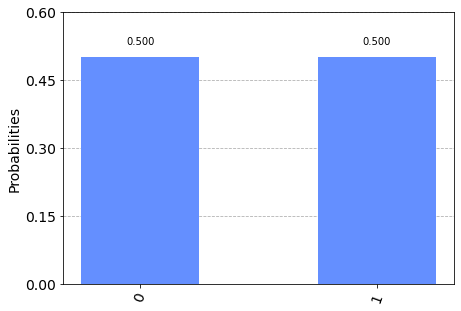

In [21]:
qobj = assemble(qc1)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)